In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/pgutti/Masters/Fall 24/MSML 602/Project/US_Accidents_March23.csv')
data.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [38]:
data.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [4]:
# Use data from 2021 to 2023
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='mixed')
data = data[data['Start_Time'] >= '2021-01-01'][data['Start_Time'] <= '2023-12-31']


/var/folders/0j/gbppp16s4jl0nj0w8snqcmjc0000gn/T/ipykernel_1965/4100554873.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data['Start_Time'] >= '2021-01-01'][data['Start_Time'] <= '2023-12-31']


In [5]:
data.isnull().sum().sort_values(ascending=False)
# see are the missing value by Percentage
missing_percentage = data.isnull().sum().sort_values(ascending=False)/len(data)*100
missing_percentage

End_Lat                  19.207896
End_Lng                  19.207896
Precipitation(in)         3.954475
Wind_Chill(F)             2.937525
Wind_Direction            2.642745
Wind_Speed(mph)           2.642297
Humidity(%)               2.290168
Visibility(mi)            2.270772
Weather_Condition         2.172783
Temperature(F)            2.152742
Pressure(in)              1.867171
Weather_Timestamp         1.675951
Nautical_Twilight         0.637085
Civil_Twilight            0.637085
Sunrise_Sunset            0.637085
Astronomical_Twilight     0.637085
Airport_Code              0.391621
Street                    0.291813
Timezone                  0.094239
Zipcode                   0.020768
City                      0.003359
Description               0.000084
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [47]:
data.Start_Time = pd.to_datetime(data.Start_Time, errors='coerce')

year = data['Start_Time'].dt.year
month = data['Start_Time'].dt.month
dayofweek = data['Start_Time'].dt.dayofweek
hour = data['Start_Time'].dt.hour
weekday_hour = data[data['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = data[data['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour

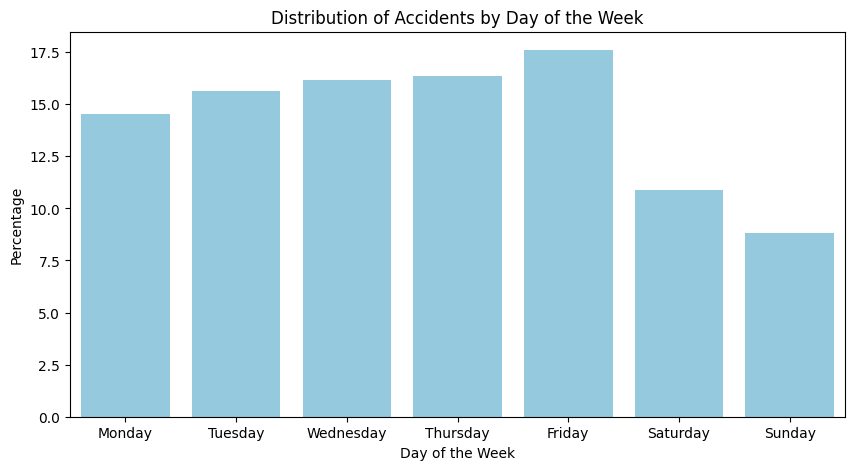

In [53]:
# Calculate the percentage of accidents for each day of the week
day_percentage = (dayofweek.value_counts(normalize=True) * 100).sort_index()

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a figure and axes for the plot
fig, axes = plt.subplots(figsize=(10, 5))

# Create a bar plot using seaborn
sns.barplot(x=day_percentage.index, y=day_percentage.values, ax=axes, color='skyblue')

# Set the title and labels for the plot
axes.set_title('Distribution of Accidents by Day of the Week')
axes.set_xlabel('Day of the Week')
axes.set_ylabel('Percentage')

# Set x-axis labels to show day names
axes.set_xticks(range(7))
axes.set_xticklabels(days)

# Show the plot
plt.show()

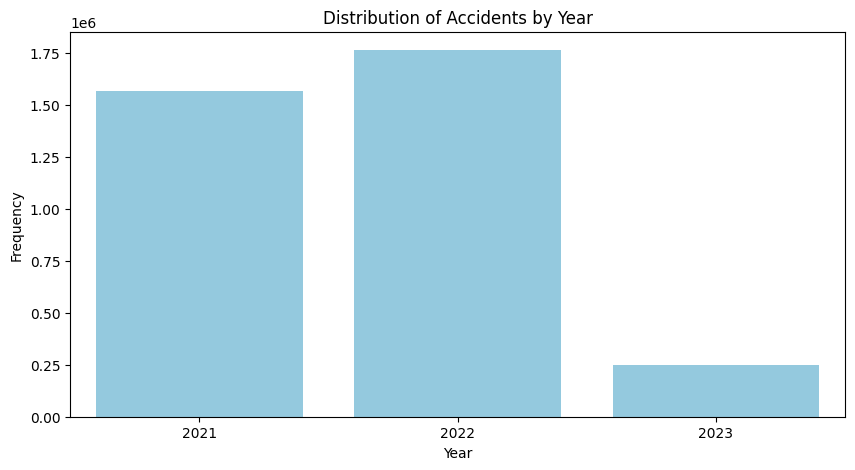

In [54]:
year = data['Start_Time'].dt.year
year_frequency = year.value_counts().sort_index()
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(x=year_frequency.index.astype(int), y=year_frequency.values, ax=axes, color='skyblue')
axes.set_title('Distribution of Accidents by Year')
axes.set_xlabel('Year')
axes.set_ylabel('Frequency')
plt.show()

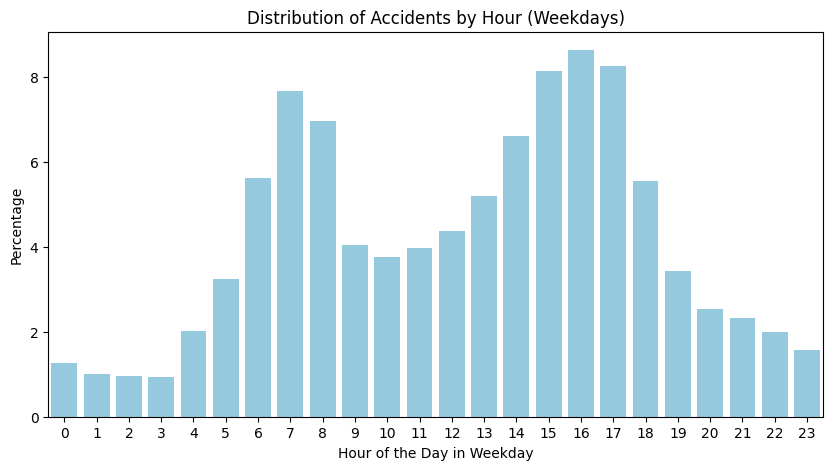

In [50]:
# Calculate the percentage of accidents for each hour
hour_percentage = (weekday_hour.value_counts(normalize=True) * 100).sort_index()

# Create the figure and Axes object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot using seaborn
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=ax, color='skyblue')

# Set the title and labels for the plot
ax.set_title('Distribution of Accidents by Hour (Weekdays)')
ax.set_xlabel('Hour of the Day in Weekday')
ax.set_ylabel('Percentage')

# Show the plot
plt.show()


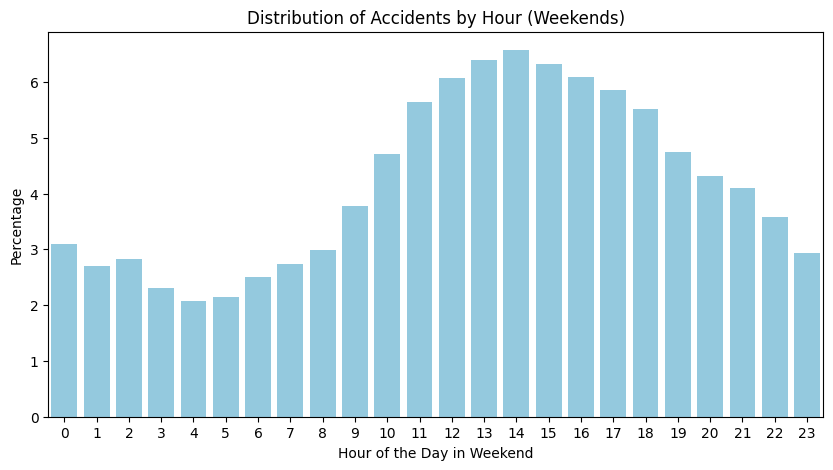

In [52]:
# Calculate the percentage of accidents for each hour during the weekend
hour_percentage_weekend = (weekend_hour.value_counts(normalize=True) * 100).sort_index()

# Create the figure and Axes object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot using seaborn
sns.barplot(x=hour_percentage_weekend.index.astype(int), y=hour_percentage_weekend.values, ax=ax, color='skyblue')

# Set the title and labels for the plot
ax.set_title('Distribution of Accidents by Hour (Weekends)')
ax.set_xlabel('Hour of the Day in Weekend')
ax.set_ylabel('Percentage')

# Show the plot
plt.show()